In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict

# Question 1 - D

In [2]:
# Q1
## average feature value of column 1:
print((0.27 + 0.31 + 0.15)/3)
## this != 0.063, thus answer A is incorrect

A = np.array( [[.27, -0.4, 0.32], [0.31, 0.37, -0.61], [0.15, 0.05, -0.39]] )
Atransposed = A.T
print("A = ")
print(A)
print("Atransposed = ")

# Normally a COLUMN is orthogonal is AT * A = diag(||A1||^2, ... ||An||^2), but since we have to
# compute the rows we instead check if A * AT = diag(||A1||^2, ... ||An||^2)
print(Atransposed)
print("A * Atransposed = ")
I = A@Atransposed
print(I)

# same issue, we compute (AT * A)T = diag(1,...,1) because of rows instead of column
print("Atransposed * A =")
J = Atransposed@A
print(J)

## in both cases the equation does not hold, so answers B and C are not correct
# this means that answer D holds

So the average feature values are not equal to that vector in the pdf, and the rows are not orthogonal (so definitely not orthonormal).

**None of the above (D)** it is!

# Question 2 - B

In [5]:
# d/dx_1 = 4*(x_1)^3 + 4
# d/dx_2 = 2 + 2*(x_2)^3
def partial_derivatives(x):
    d_dx1 = 4*(x[0])**3 + 4
    d_dx2 = 2 + 2*(x[1])**3
    return (d_dx1, d_dx2)

def gradient_descent(point, eta, eps):
    steps_taken = 0
    while True:
        steps_taken += 1
        gradients = partial_derivatives(point)
        new_x = point[0] - eta * gradients[0]
        new_y = point[1] - eta * gradients[1]
        if (new_x >= point[0] - eps and new_x <= point[0] + eps) and \
           (new_y >= point[1] - eps and new_y <= point[1] + eps):
            print(f'Converged in {steps_taken} steps.')
            return point
        else:
            point = (new_x, new_y)

In [56]:
# A: does not converge.
# B: yes with eps=0.00005, 49 steps otherwise
# C: one of them doesn't converge, so definitely not
# D: considering B converges with this setting, False.
gradient_descent((2,1), 0.1, 0.00005)

Converged in 19 steps.


(-0.9999999999969128, -0.9999601816503486)

Well, none of them are really 100% correct but answer **B** is closest

# Question 3 - C

In [7]:
diabetes_train = pd.read_csv('data/diabetes_train_data.csv')
diabetes_val = pd.read_csv('data/diabetes_validate_data.csv')

In [8]:
diabetes_train.head()

,Glucose,BloodPressure,Outcome
0,115,98,0
1,142,60,0
2,116,72,0
3,126,60,1
4,78,70,0


In [9]:
diabetes_train.describe()

,Glucose,BloodPressure,Outcome
count,514.000000,514.000000,514.000000
mean,121.295720,69.984436,0.354086
std,32.358526,18.008763,0.478701
min,0.000000,0.000000,0.000000
25%,99.000000,64.000000,0.000000
50%,117.000000,72.000000,0.000000
75%,140.000000,80.000000,1.000000
max,199.000000,122.000000,1.000000


<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

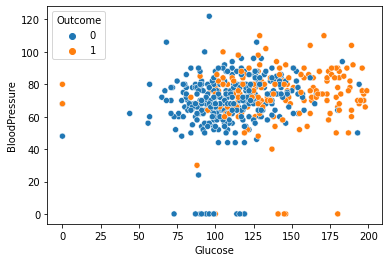

In [10]:
sns.scatterplot(x=diabetes_train.Glucose, y=diabetes_train.BloodPressure, hue=diabetes_train.Outcome)

In [11]:
diabetes_X = diabetes_train.drop('Outcome', axis=1).values
diabetes_y = diabetes_train['Outcome']

In [13]:
def knn(new_data, k):
    predicted_labels = []
    
    for point in new_data:
        nearest_points = []
        index = 0
        for i in range(diabetes_X.shape[0]):
            # Euclidean distance
            dist_glucose = (diabetes_X[i,0]-point[0])**2
            dist_bloodpressure = (diabetes_X[i,1]-point[1])**2
            distance = np.sqrt(dist_glucose + dist_bloodpressure)

            if len(nearest_points) != k:
                # Still populating the list of k nearest neighbours
                nearest_points.append((distance, diabetes_y[i]))
                nearest_points.sort(key=lambda neighbour: neighbour[0])
            elif nearest_points[-1][0] > distance:
                # Current observed data point is closer than furthest away
                #   previously known one. Replace and re-sort.
                nearest_points[-1] = (distance, diabetes_y[i])
                nearest_points.sort(key=lambda neighbour: neighbour[0])
            # Else: this point was not close enough to be relevant for knn

        # As the target label is binary, we can shortcut the label decision process
        # Note: 0.5 is rounded to 0 by Python
        nearest_labels = np.array(nearest_points)[:,1]
        most_common_label = round(np.mean(nearest_labels))
        predicted_labels.append(most_common_label)
        
    return predicted_labels

In [64]:
def evaluation(predictions, truth):
    if len(predictions) != len(truth):
        raise ValueError(f"Lengths of predictions ({len(predictions)}) & true values ({len(truth)}) do not match")
    
    correct = 0
    incorrect = 0
    
    for i in range(len(predictions)):
        if predictions[i] == truth[i]:
            correct += 1
        else:
            incorrect += 1
    
    if incorrect == 0:
        return 1
    else:
        return correct/(correct+incorrect)

In [65]:
validation_data = diabetes_val.drop('Outcome', axis=1).values
validation_labels = diabetes_val['Outcome']

In [66]:
# For the answers
accuracy_k1 = evaluation(knn(validation_data, 1), validation_labels)
accuracy_k2 = evaluation(knn(validation_data, 2), validation_labels)
accuracy_k3 = evaluation(knn(validation_data, 3), validation_labels)
accuracy_k4 = evaluation(knn(validation_data, 4), validation_labels)

In [58]:
def recall(actual, predicted):
  correct = 0
  actual_no = 0
  for i in range(len(actual)):
    if actual[i] == 0:
      actual_no += 1
      if actual[i] == predicted[i]:
        correct += 1
  if correct == actual_no:
    return actual_no,correct
  else:
    return False

In [68]:
predictions = knn(validation_data, 3)
question_a_true = recall(validation_labels, predictions)

In [69]:
print(f'Question A: recall of 1 on k=3? | bool(recall == 1) = {question_a_true} ')
print(f'Question B: k=3 higher val than k=2: {accuracy_k3 > accuracy_k2} ({round(accuracy_k3, 3)} VS {round(accuracy_k2, 3)})')
print(f'Question C: k=4 higher val than k=2: {accuracy_k4 > accuracy_k2} ({round(accuracy_k4, 3)} VS {round(accuracy_k2, 3)})')
print(f'Question D: 70.07% accuracy on k=1? | accuracy = {round(accuracy_k1*100, 2)}%')

Question A: recall of 1 on k=3? | bool(recall == 1) = False 
Question B: k=3 higher val than k=2: False (0.693 VS 0.713)
Question C: k=4 higher val than k=2: True (0.736 VS 0.713)
Question D: 70.07% accuracy on k=1? | accuracy = 67.72%


We have exactly one correct answer, so **C is true**

# Question 4 - D

Observation question, also confusion.

Correct class 0's: 4/4

Missed class 1's: 1/4

- A is untrue, you can linearly separate this data.
- B is untrue, considering that the data is linearly separable we should not get a classifier that fails at that.
- C is untrue, 4/4 = 100% of zeroes is correctly classified
- D is true, 1/4 = 25% of ones is indeed misclassified

**D is true**

# Question 5 - C

In [19]:
heart_train = pd.read_csv('data/heart_train_data.csv')
heart_val = pd.read_csv('data/heart_validate_data.csv')

In [20]:
heart_train.head()

,cp,exang,thal,target
0,0,1,2,0
1,3,0,2,1
2,3,0,2,1
3,2,0,2,1
4,0,0,3,0


In [21]:
heart_train.describe()

,cp,exang,thal,target
count,210.000000,210.000000,210.000000,210.000000
mean,0.947619,0.323810,2.314286,0.557143
std,1.031615,0.469046,0.558780,0.497911
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000
50%,1.000000,0.000000,2.000000,1.000000
75%,2.000000,1.000000,3.000000,1.000000
max,3.000000,1.000000,3.000000,1.000000


In [22]:
# My own thing, not exactly lecture code 100% literal
def calc_probs(dataset, data_columns, target):
    # Using a defaultdict to have a built in interpretation of accessing absent values
    target_probs = defaultdict(lambda: 0)
    cond_probs = {}
    target_values = pd.unique(dataset[target])
    nr_points = dataset.shape[0]
    
    for column in data_columns:
        # Using a defaultdict to have a built in solution to accessing absent values
        for target_value in target_values:
            cond_probs[(column, target_value)] = defaultdict(lambda: 0)
    
    # Iterate over the rows, and count all occurrences of 
    #   each target value and of each (target, data_col) combination
    for index, row in dataset.iterrows():
        target_probs[row[target]] += 1
        
        for column in data_columns:
            # Per column in this row of data, update the corresponding
            #   (column | target) dict with +1 occurrence of this particular
            #   target, value pair (new occurrences start at 0+1=1)
            cond_probs[(column, row[target])][row[column]] += 1
    
    # Now, after seeing all rows, calculate the right probabilities
    for col_given_target in cond_probs.keys():
        # Because we do cond_probs first, target_probs at this point contains
        #   the target occurrences and not yet the probabilities. We use these here.
        target_occurrences = target_probs[col_given_target[1]]
        
        for column_value in cond_probs[col_given_target].keys():
            cond_probs[col_given_target][column_value] /= target_occurrences
    
    # Now, lastly, convert target occurrences to target probabilities
    for target_value in target_values:
        target_probs[target_value] /= nr_points
        
    return target_probs, cond_probs

In [23]:
def naive_bayes_predict(dataset, target_probs, cond_probs):
    targets = target_probs.keys()
    data_columns = dataset.columns
    predictions = []
    
    for index, row in dataset.iterrows():
        row_predictions = {}
        for target in targets:
            target_prob = target_probs[target]
            for column in data_columns:
                target_prob *= cond_probs[(column, target)][row[column]]
            row_predictions[target] = target_prob
        
#         print(f'Predictions: {row_predictions}')
        most_likely_target = max(row_predictions, key=row_predictions.get)
#         print(f'Most likely target: {most_likely_target}')
        predictions.append(most_likely_target)
    
    return predictions

In [24]:
target_probs, cond_probs = calc_probs(heart_train, ["cp", "exang", "thal"], 'target')

In [25]:
validation_data = heart_val.drop('target', axis=1)
validation_target = heart_val['target']

In [26]:
# Question A: prediction
question_data = pd.DataFrame(data={'cp':[3], 'exang':[1], 'thal':[1]})
naive_bayes_prediction = naive_bayes_predict(question_data, target_probs, cond_probs)
print(f'Option A: Patient predicted as NOT having heart disease (target=1)? | Prediction = {naive_bayes_prediction}')

Option A: Patient predicted as NOT having heart disease (target=1)? | Prediction = [0]


In [27]:
# Question B: I need extra code to do this now...
atypical_angina = 0
nr_points = heart_train.shape[0]
for index, row in heart_train.iterrows():
    if row['cp'] == 1:
        atypical_angina += 1
print(f'Option B: 48% occurrence of atypical angina? | occurrence = {atypical_angina / nr_points * 100}%')

Option B: 48% occurrence of atypical angina? | occurrence = 16.666666666666664%


In [28]:
# Question C: singular conditional prob
prob = cond_probs[('thal', 0)][1]
print(f'Option C: probability equal to 0.075? | probability = {prob}')

Option C: probability equal to 0.075? | probability = 0.07526881720430108


In [29]:
# Question D: accuracy
naive_bayes_prediction = naive_bayes_predict(validation_data, target_probs, cond_probs)
accuracy = evaluation(naive_bayes_prediction, validation_target)
print(f'Option D: Accuracy on validation set 80%? | accuracy = {accuracy*100}%')

Option D: Accuracy on validation set 80%? | accuracy = 74.72527472527473%


Turns out it is in fact **c that is the correct answer**.

# Question 6 - C

In [30]:
class Node:
    def __init__(self, data):
        self.data = data
        self.no_child = None
        self.yes_child = None
        self.decisions = self._generate_decisions(data, ['cp', 'exang', 'thal'])
        self.decision_used = None
        self.probabilities = self._calc_data_probs()
        
    def _generate_decisions(self, dataset, cols_to_generate_for):
        decisions = []
        for column in cols_to_generate_for:
            values = pd.unique(dataset[column])
            for value in values:
                decisions.append((column, value))
        return decisions
    
    def _cost(self, no_node, yes_node):
        own_nr_points = self.data.shape[0]
        no_nr_points  = no_node.data.shape[0]
        yes_nr_points = yes_node.data.shape[0]
        return ((no_nr_points/own_nr_points * no_node.calc_entropy()
                 + yes_nr_points/own_nr_points * yes_node.calc_entropy())
                 - self.calc_entropy())
    
    def _calc_data_probs(self):
        # Binary data, so we can simplify this calculation
        probabilities = {}
        probabilities[1] = self.data.target.mean()
        probabilities[0] = 1 - probabilities[1]
        return probabilities
    
    def calc_entropy(self):
        entropy = 0
        if self.probabilities[0] == 1 or self.probabilities[1] == 1:
            # No impurity, pure node
            return 0
        
        for key in self.probabilities:
            entropy += self.probabilities[key] * np.log(self.probabilities[key])
        return -1 * entropy
    
    def split(self, depth_remaining):
        """Note that no intelligent stopping criterion is implemented, just 'run until depth'"""
        if depth_remaining == 0:
            # Pseudocode says learn p(Y), done in __init__ since self.probabilities
            #   is also needed for cost calculations
            return
        
        # For all possible decisions, calculate cost
        lowest_cost_so_far = np.inf
        
        # After this for loop, the lowest cost is found and the new children are stored
        for decision in self.decisions:
            # Create the subsets that the children would have, and calculate the cost of this 
            #   particular decision. Then store it, so we can later choose the best one.
            no_data   = self.data[self.data[decision[0]] != decision[1]]
            yes_data  = self.data[self.data[decision[0]] == decision[1]]
            no_child  = Node(no_data)
            yes_child = Node(yes_data)
            cost = self._cost(no_child, yes_child)
            
            # If this is the best cost so far, store what we built to find it
            if cost < lowest_cost_so_far:
                lowest_cost_so_far = cost
                self.decision_used = decision
                self.no_child = no_child
                self.yes_child = yes_child
                
        # Now for the recursive part: the children get to split as well, up to max depth.
        self.no_child.split(depth_remaining-1)
        self.yes_child.split(depth_remaining-1)

In [31]:
def CART(dataset):
    root = Node(dataset)
    # Question says to have a max depth of 3, and so we do that here
    root.split(3)
    return root

In [32]:
def predict_decision_tree(root_node, dataset):
    predictions = []
    
    for index, row in dataset.iterrows():
        node = root_node
        while node.decision_used is not None:
            # Navigate down the tree via the decision for each node
            decision_column = node.decision_used[0]
            decision_value  = node.decision_used[1]
            if row[decision_column] == decision_value:
                node = node.yes_child
            else:
                node = node.no_child
        
        # Leaf reached
        row_predictions = node.probabilities
        
        most_likely_target = max(row_predictions, key=row_predictions.get)
        predictions.append(most_likely_target)
    
    return predictions

In [33]:
tree_root = CART(heart_train)

In [34]:
# Question A
decision_tree_predictions = predict_decision_tree(tree_root, validation_data)
naive_bayes_val_acc = evaluation(naive_bayes_prediction, validation_target)
decision_tree_val_acc = evaluation(decision_tree_predictions, validation_target)
print(f"Option A: Decision tree validation accuracy > Naive Bayes validation accuracy? | "
      f"{decision_tree_val_acc > naive_bayes_val_acc} ({round(decision_tree_val_acc, 3)} > {round(naive_bayes_val_acc, 3)})")

Option A: Decision tree validation accuracy > Naive Bayes validation accuracy? | False (0.725 > 0.747)


In [35]:
# Question B
print(f'Option B: Root decision thal == 3? | decision is {tree_root.decision_used[0]} == {tree_root.decision_used[1]}')

Option B: Root decision thal == 3? | decision is cp == 0


In [36]:
# Question C
question_data = pd.DataFrame(data={'cp':[0], 'exang':[0], 'thal':[3]})
decision_tree_prediction = predict_decision_tree(tree_root, question_data)
print(f'Option C: is this particular patient predicted to have a heart disease (target=0)? '
      f'| Prediction = {decision_tree_prediction}')

Option C: is this particular patient predicted to have a heart disease (target=0)? | Prediction = [0]


In [37]:
# Question D
def in_order_walk(tree):
    if tree.no_child:
        in_order_walk(tree.no_child)
    
    if not tree.no_child and not tree.yes_child:
        # Only visit leaves
        print(f"Entropy of leaf: {tree.calc_entropy()}")
    
    if tree.yes_child:
        in_order_walk(tree.yes_child)

in_order_walk(tree_root)
print('Option D: does only one of the leaf nodes shown above have impurity == 0? | None do, so definitely not "only one"')

Entropy of leaf: 0.23810973994596282
Entropy of leaf: 0.5297061990576545
Entropy of leaf: 0.6365141682948128
Entropy of leaf: 0.6581099875431143
Entropy of leaf: 0.19490868718781756
Entropy of leaf: 0.47413931305783746
Entropy of leaf: 0.6460905050608089
Entropy of leaf: 0.5004024235381879
Option D: does only one of the leaf nodes shown above have impurity == 0? | None do, so definitely not "only one"


Seems like only C is true, which is a good sign. **Answer C it is!**